# Notebook

In [2]:
using Pkg
Pkg.add("MAT")

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [23992714] + MAT v0.10.7
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [f67ccb44] + HDF5 v0.17.2
  [23992714] + MAT v0.10.7
  [3da0fdf6] + MPIPreferences v0.1.11
  [0234f1f7] + HDF5_jll v1.14.3+3
  [e33a78d0] + Hwloc_jll v2.11.1+0
  [7cb0a576] + MPICH_jll v4.2.2+0
  [f1f71cc9] + MPItrampoline_jll v5.4.0+0
  [9237b28f] + MicrosoftMPI_jll v10.1.4+2
⌅ [fe0851c0] + OpenMPI_jll v4.1.6+0
  [477f73a3] + libaec_jll v1.1.2+0
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`
Precompiling project...
  ✓ Hwloc_jll
  ✓ MPIPreferences
  ✓ MicrosoftMPI_jll
  ✓ libaec_jll
  ✓ OpenMPI_jll
  ✓ MPItrampoline_jll
  ✓ MPICH_jll
  ✓ HDF5_jll
  ✓ HDF5
  ✓ MAT
  10 dependencies successfully precompiled in 11 seconds. 256 already precompiled.


In [3]:
using Pkg
Pkg.add("Plots")
Pkg.add("Colors")


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [5ae59095] + Colors v0.12.11
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [1]:
using Plots
using SparseArrays
using LinearAlgebra
using MAT

# using GeoDataFrames
# using DataFrames
# using GeometryBasics 

# local modules
push!(LOAD_PATH, realpath("."))
using vem_problem
using plot_solution
using read_mat

## Entering Data Into Mesh

Uses `vem_problem` module and `Mesh` struct.

In [2]:
# Example mesh data
vertices = [(0.0, 0.0), (1.5, 0.0), (1.2, 1.0), (0.0, 1.0), (0.7, 0.4)]
elements = [[1, 2, 5], [2, 3, 5], [3, 4, 5], [4, 1, 5]]
boundary = [1, 2, 3, 4]

#values = [0.1, 0.5, 0.7, 0.9]  # Values assigned to each element

# Create the mesh
mesh_data = Mesh(boundary, elements, vertices)

println("Boundary Nodes: ", mesh_data.boundary)
println("Element Nodes: ", mesh_data.elements)
println("Node Coordinates: ", mesh_data.vertices)

Boundary Nodes: [1, 2, 3, 4]
Element Nodes: [[1, 2, 5], [2, 3, 5], [3, 4, 5], [4, 1, 5]]
Node Coordinates: [(0.0, 0.0), (1.5, 0.0), (1.2, 1.0), (0.0, 1.0), (0.7, 0.4)]


# Read .mat files into struct

Uses `read_mat` module.

In [3]:
filepath = "/Users/roryyarr/Desktop/UON/Summer project 2023-2024/NA45/vem_50lines/meshes/voronoi.mat"

mat_data = read_mat_to_vem_problem(filepath)

println("Boundary Nodes: ", mat_data.boundary)
println("Element Nodes: ", mat_data.elements)
println("Node Coordinates: ", mat_data.vertices)

Boundary Nodes: [1, 2, 3, 4, 10, 14, 15, 18, 19, 20, 24, 25, 69, 80, 82, 83, 107, 108, 109, 133, 134, 138, 139, 140, 171, 174, 175, 183, 186, 189, 191, 199, 200, 201, 204, 206, 208, 209, 210, 211, 217, 218, 228, 229, 240, 250, 268, 270, 271, 272, 273, 274, 275, 276, 318, 321, 322, 324, 326, 327, 329, 335, 336, 337, 340, 361, 364, 387, 389, 390, 392, 393, 396, 397, 400, 403, 413, 417, 418, 427, 428, 454, 455, 456, 457, 458, 465, 466, 467, 472, 473, 474, 495, 499, 500, 524, 525, 526, 532, 533, 535, 538, 558, 559, 564, 604, 605, 610, 611, 637, 638, 670, 671, 694, 711, 713, 714, 718, 719, 720, 737, 738, 739, 740, 741, 742, 744, 745, 746, 747, 750, 761, 763, 776, 777, 785, 786, 822, 824, 828, 829, 834, 835, 849, 851]
Element Nodes: [[293, 294, 292, 517, 514, 291], [32, 35, 522, 521, 113, 34], [278, 508, 695, 697, 304], [868, 602, 603, 817, 816, 869], [435, 429, 430, 432, 431, 434], [687, 689, 688, 685, 684, 686], [437, 433, 79, 81, 78, 77], [298, 309, 308, 135, 297], [848, 850, 851, 849], [

# Square domain

In [4]:
function square_domain_rhs(points::Array{Float64, 2})::Vector{Float64}
    # SQUARE_DOMAIN_RHS evaluates the right-hand side function of a PDE on a square domain

    x = points[:, 1]
    y = points[:, 2]
    f = 15 * sin.(π * x) .* sin.(π * y) # Element-wise multiplication and sine

    return f
end

square_domain_rhs (generic function with 1 method)

In [8]:
function square_domain_boundary_condition(points::Array{Float64, 2})::Vector{Float64}
    # SQUARE_DOMAIN_BOUNDARY_CONDITION evaluates the boundary condition of a PDE on a square domain

    x = points[:, 1]
    y = points[:, 2]
    g = (1 .- x) .* y .* sin.(π * x) # Element-wise operations

    return g
end

square_domain_boundary_condition (generic function with 1 method)

## Main Method

<details>
	<summary> Oliver sutens original code </summary>

```matlab

mesh = load(mesh_filepath); % Load the mesh from a .mat file
n_dofs = size(mesh.vertices, 1); n_polys = 3; % Method has 1 degree of freedom per vertex
K = sparse(n_dofs, n_dofs); % Stiffness matrix
F = zeros(n_dofs, 1); % Forcing vector
u = zeros(n_dofs, 1); % Degrees of freedom of the virtual element solution
linear_polynomials = {[0,0], [1,0], [0,1]}; % Impose an ordering on the linear polynomials
mod_wrap = @(x, a) mod(x-1, a) + 1; % A utility function for wrapping around a vector
for el_id = 1:length(mesh.elements)
	vert_ids = mesh.elements{el_id}; % Global IDs of the vertices of this element
	verts = mesh.vertices(vert_ids, :); % Coordinates of the vertices of this element
	n_sides = length(vert_ids); % Start computing the geometric information
	area_components = verts(:,1) .* verts([2:end,1],2) - verts([2:end,1],1) .* verts(:,2);
	area = 0.5 * abs(sum(area_components));
	centroid = sum((verts + verts([2:end,1],:)) .* repmat(area_components,1,2)) / (6*area);
	diameter = 0; % Compute the diameter by looking at every pair of vertices
	for i = 1:(n_sides-1)
		for j = (i+1):n_sides
			diameter = max(diameter, norm(verts(i, :) - verts(j, :)));
		end
	end
	D = zeros(n_sides, n_polys); D(:, 1) = 1;
	B = zeros(n_polys, n_sides); B(1, :) = 1/n_sides;
	for vertex_id = 1:n_sides
		vert = verts(vertex_id, :); % This vertex and its neighbours
		prev = verts(mod_wrap(vertex_id - 1, n_sides), :);
		next = verts(mod_wrap(vertex_id + 1, n_sides), :);
		vertex_normal = [next(2) - prev(2), prev(1) - next(1)]; % Average of edge normals
		for poly_id = 2:n_polys % Only need to loop over non-constant polynomials
			poly_degree = linear_polynomials{poly_id};
			monomial_grad = poly_degree / diameter; % Gradient of a linear is constant
			D(vertex_id, poly_id) = dot(vert - centroid, poly_degree) / diameter;
			B(poly_id, vertex_id) = 0.5 * dot(monomial_grad, vertex_normal);
		end
	end
	projector = (B*D) \ B; % Compute the local Ritz projector to polynomials
	stabilising_term = (eye(n_sides) - D * projector)' * (eye(n_sides) - D * projector);
	G = B*D; G(1, :) = 0;
	local_stiffness = projector' * G * projector + stabilising_term;
	K(vert_ids,vert_ids) = K(vert_ids,vert_ids) + local_stiffness; % Copy local to global
	F(vert_ids) = F(vert_ids) + rhs(centroid) * area / n_sides;
end
boundary_vals = boundary_condition(mesh.vertices(mesh.boundary, :));
internal_dofs = ~ismember(1:n_dofs, mesh.boundary); % Vertices which aren't on the boundary
F = F - K(:, mesh.boundary) * boundary_vals; % Apply the boundary condition
u(internal_dofs) = K(internal_dofs, internal_dofs) \ F(internal_dofs); % Solve
u(mesh.boundary) = boundary_vals; % Set the boundary values
plot_solution(mesh, u)
end

```

</details>

<details>
    <summary> Mermaid diagram of matlab code </summary>

```mermaid
graph TD
    A[Start] --> B[Load mesh from .mat file]
    B --> C[Initialize K, F, u]
    C --> D[Define linear polynomials]
    D --> D1{Loop over mesh elements}
    
    D1 --> D2[Get vert_ids, vertices and n_sides for each element]
    D2 --> D3[Calculate geometric properties: area, centroid]
    D3 --> D3a{Loop over sides}
    D3a --> D3b[Calculate diameter]
    D3b --> D3
    D3 --> D4[Initialize D and B]

    D4 --> D4a{Loop over vertices}
    D4a --> D4b[Calculate vertex normal]
    D4b --> D4b1{Loop over polynomial basis}
    D4b1 --> D4b2[Calculate gradient]
    D4b2 --> D4b3[Update D and B matrices]
    D4b3 --> D4a

    D4a --> D5[Compute local Ritz projector]
    D5 --> D6[Compute stabilizing term]
    D6 --> D7[Compute G matrix]
    D7 --> D8[Assemble local stiffness matrix]
    D8 --> D9[Update K and F matrices]
    D9 --> D1

    D1 --> |All elements processed?| E[Calculate boundary values]
    E --> F[Calculate internal DOFs]
    F --> G[Calculate local stiffness term]
    G --> H[Update K and F]
    H --> I[Solve for u]
    I --> J[End]
```

</details>

### Working section

In [19]:
function vem(mesh::Mesh, rhs::Function, boundary_condition::Function; debug::Bool=false)::Vector{Float64}
    n_dofs = length(mesh.vertices)
    n_polys = 3  # Method has 1 degree of freedom per vertex

    K = spzeros(Float64, n_dofs, n_dofs)  # Stiffness matrix
    F = zeros(n_dofs)  # Forcing vector
    u = zeros(n_dofs)  # Degrees of freedom of the virtual element solution
    linear_polynomials = [[0, 0], [1, 0], [0, 1]]  # Linear polynomials

    if debug
        println("Number of DOFs: ", n_dofs)
        println("Initial K: ", K)
        println("Initial F: ", F)
        println("Initial u: ", u)
    end

    for el_id in 1:length(mesh.elements)
        vert_ids = mesh.elements[el_id]  # Global IDs of the vertices of this element
        verts = [mesh.vertices[v] for v in vert_ids]  # Coordinates of the vertices of this element
        n_sides = length(vert_ids)  # Number of sides of the polygon

        if debug
            println("\nElement ID: ", el_id)
            println("Vertex IDs: ", vert_ids)
            println("Vertices: ", verts)
            println("Number of sides: ", n_sides)
        end

        # Start computing geometric information
        verts_array = hcat([collect(v) for v in verts]...)'  # Convert list of tuples to matrix
        area_components = verts_array[:,1] .* verts_array[[2:end; 1],2] .- verts_array[[2:end; 1],1] .* verts_array[:,2]
        area = 0.5 * abs(sum(area_components))

        if debug
            println("Vertices array: ", verts_array)
            println("Area components: ", area_components)
            println("Area: ", area)
        end

        centroid = sum((verts_array .+ verts_array[[2:end; 1],:]) .* repeat(area_components, 1, 2), dims=1) / (6 * area)
        diameter = 0.0
        for i in 1:(n_sides-1)
            for j in (i+1):n_sides
                diameter = max(diameter, norm(verts_array[i, :] - verts_array[j, :]))
            end
        end

        if debug
            println("Centroid: ", centroid)
            println("Diameter: ", diameter)
        end

        D = zeros(n_sides, n_polys)
        D[:, 1] .= 1  # First column is constant
        B = zeros(n_polys, n_sides)
        B[1, :] .= 1 / n_sides  # First row is constant

        # Fill matrices D and B, and compute the element stiffness matrix and load vector
        for vertex_id in 1:n_sides
            vert = verts[vertex_id]
            prev = verts[mod(vertex_id - 2, n_sides) + 1]
            next = verts[mod(vertex_id, n_sides) + 1]

            vert_x, vert_y = vert
            prev_x, prev_y = prev
            next_x, next_y = next

            vertex_normal = [next_y - prev_y, prev_x - next_x]
            centroid_vec = vec(centroid)

            if debug
                println("\nVertex ID: ", vertex_id)
                println("Vertex: ", vert)
                println("Previous Vertex: ", prev)
                println("Next Vertex: ", next)
                println("Vertex Normal: ", vertex_normal)
            end

            for poly_id in 2:n_polys
                poly_degree = linear_polynomials[poly_id]
                monomial_grad = poly_degree / diameter

                D[vertex_id, poly_id] = dot([vert_x, vert_y] .- centroid_vec, poly_degree) / diameter
                B[poly_id, vertex_id] = 0.5 * dot(monomial_grad, vertex_normal)

                if debug
                    println("Poly ID: ", poly_id)
                    println("Monomial Gradient: ", monomial_grad)
                    println("D[", vertex_id, ", ", poly_id, "]: ", D[vertex_id, poly_id])
                    println("B[", poly_id, ", ", vertex_id, "]: ", B[poly_id, vertex_id])
                end
            end
        end

        projector = (B * D) \ B
        stabilising_term = (I - D * projector)' * (I - D * projector)

        G = B * D
        G[1, :] .= 0  # Set the first row to 0

        local_stiffness = projector' * G * projector + stabilising_term

        if debug
            println("\nProjector: ", projector)
            println("Stabilising Term: ", stabilising_term)
            println("G Matrix: ", G)
            println("Local Stiffness: ", local_stiffness)
        end

        # Update the global stiffness matrix element-wise
        for i in 1:length(vert_ids)
            for j in 1:length(vert_ids)
                K[vert_ids[i], vert_ids[j]] += local_stiffness[i, j]
                if debug
                    println("Updated K[", vert_ids[i], ", ", vert_ids[j], "]: ", K[vert_ids[i], vert_ids[j]])
                end
            end
        end

        # Use the modified rhs function with vertices
        # rhs_value = rhs([mesh.vertices[v] for v in vert_ids])[1]
        points_matrix = hcat([collect(mesh.vertices[v]) for v in vert_ids]...)
        rhs_value = rhs(points_matrix)[1]

        if debug
            println("RHS value: ", rhs_value)
        end

        F[vert_ids] .+= rhs_value * area / n_sides
        if debug
            println("Updated F: ", F)
        end
    end

    # Convert mesh.vertices to the correct format and apply boundary conditions
    boundary_values = boundary_condition(mesh.vertices)
    if debug
        println("Boundary Values: ", boundary_values)
    end

    for idx in mesh.boundary
        u[idx] = boundary_values[idx]  # Apply the boundary values directly
        K[idx, :] .= 0  # Zero out the row
        K[idx, idx] = 1.0  # Set the diagonal to 1
        F[idx] = boundary_values[idx]  # Set the forcing term to the boundary value
        if debug
            println("Boundary Condition Applied at Index ", idx)
            println("Updated K: ", K)
            println("Updated F: ", F)
        end
    end

    # Solve the system
    u = K \ F

    if debug
        println("Final Solution u: ", u)
    end

    return u
end

vem (generic function with 1 method)

In [33]:
function vem(mesh::Mesh, rhs::Function, boundary_condition::Function; debug::Bool=false, debug_file_path::String="vem_debug_output.txt")::Vector{Float64}
    n_dofs = length(mesh.vertices)
    n_polys = 3  # Method has 1 degree of freedom per vertex

    K = spzeros(Float64, n_dofs, n_dofs)  # Stiffness matrix
    F = zeros(n_dofs)  # Forcing vector
    u = zeros(n_dofs)  # Degrees of freedom of the virtual element solution
    linear_polynomials = [[0, 0], [1, 0], [0, 1]]  # Linear polynomials

    # Open the debug file for writing
    debug_file = open(debug_file_path, "w")

    if debug
        write(debug_file, "Number of DOFs: $n_dofs\n")
        write(debug_file, "Initial K: $K\n")
        write(debug_file, "Initial F: $F\n")
        write(debug_file, "Initial u: $u\n")
    end

    for el_id in 1:length(mesh.elements)
        vert_ids = mesh.elements[el_id]  # Global IDs of the vertices of this element
        verts = [mesh.vertices[v] for v in vert_ids]  # Coordinates of the vertices of this element
        n_sides = length(vert_ids)  # Number of sides of the polygon

        if debug
            write(debug_file, "\nElement ID: $el_id\n")
            write(debug_file, "Vertex IDs: $vert_ids\n")
            write(debug_file, "Vertices: $verts\n")
            write(debug_file, "Number of sides: $n_sides\n")
        end

        # Start computing geometric information
        verts_array = hcat([collect(v) for v in verts]...)'  # Convert list of tuples to matrix
        area_components = verts_array[:,1] .* verts_array[[2:end; 1],2] .- verts_array[[2:end; 1],1] .* verts_array[:,2]
        area = 0.5 * abs(sum(area_components))

        if debug
            write(debug_file, "Vertices array: $verts_array\n")
            write(debug_file, "Area components: $area_components\n")
            write(debug_file, "Area: $area\n")
        end

        centroid = sum((verts_array .+ verts_array[[2:end; 1],:]) .* repeat(area_components, 1, 2), dims=1) / (6 * area)
        diameter = 0.0
        for i in 1:(n_sides-1)
            for j in (i+1):n_sides
                diameter = max(diameter, norm(verts_array[i, :] - verts_array[j, :]))
            end
        end

        if debug
            write(debug_file, "Centroid: $centroid\n")
            write(debug_file, "Diameter: $diameter\n")
        end

        D = zeros(n_sides, n_polys)
        D[:, 1] .= 1  # First column is constant
        B = zeros(n_polys, n_sides)
        B[1, :] .= 1 / n_sides  # First row is constant

        # Fill matrices D and B, and compute the element stiffness matrix and load vector
        for vertex_id in 1:n_sides
            vert = verts[vertex_id]
            prev = verts[mod(vertex_id - 2, n_sides) + 1]
            next = verts[mod(vertex_id, n_sides) + 1]

            vert_x, vert_y = vert
            prev_x, prev_y = prev
            next_x, next_y = next

            vertex_normal = [next_y - prev_y, prev_x - next_x]
            centroid_vec = vec(centroid)

            if debug
                write(debug_file, "\nVertex ID: $vertex_id\n")
                write(debug_file, "Vertex: $vert\n")
                write(debug_file, "Previous Vertex: $prev\n")
                write(debug_file, "Next Vertex: $next\n")
                write(debug_file, "Vertex Normal: $vertex_normal\n")
            end

            for poly_id in 2:n_polys
                poly_degree = linear_polynomials[poly_id]
                monomial_grad = poly_degree / diameter

                D[vertex_id, poly_id] = dot([vert_x, vert_y] .- centroid_vec, poly_degree) / diameter
                B[poly_id, vertex_id] = 0.5 * dot(monomial_grad, vertex_normal)

                if debug
                    write(debug_file, "Poly ID: $poly_id\n")
                    write(debug_file, "Monomial Gradient: $monomial_grad\n")
                    write(debug_file, "D[$vertex_id, $poly_id]: $(D[vertex_id, poly_id])\n")
                    write(debug_file, "B[$poly_id, $vertex_id]: $(B[poly_id, vertex_id])\n")
                end
            end
        end

        projector = (B * D) \ B
        stabilising_term = (I - D * projector)' * (I - D * projector)

        G = B * D
        G[1, :] .= 0  # Set the first row to 0

        local_stiffness = projector' * G * projector + stabilising_term

        if debug
            write(debug_file, "\nProjector: $projector\n")
            write(debug_file, "Stabilising Term: $stabilising_term\n")
            write(debug_file, "G Matrix: $G\n")
            write(debug_file, "Local Stiffness: $local_stiffness\n")
        end

        # Update the global stiffness matrix element-wise
        for i in 1:length(vert_ids)
            for j in 1:length(vert_ids)
                K[vert_ids[i], vert_ids[j]] += local_stiffness[i, j]
                if debug
                    write(debug_file, "Updated K[$(vert_ids[i]), $(vert_ids[j])]: $(K[vert_ids[i], vert_ids[j]])\n")
                end
            end
        end

        rhs_value = rhs([mesh.vertices[v] for v in vert_ids])[1]
        if debug
            write(debug_file, "RHS value: $rhs_value\n")
        end

        F[vert_ids] .+= rhs_value * area / n_sides
        if debug
            write(debug_file, "Updated F: $F\n")
        end
    end

    boundary_values = boundary_condition(mesh.vertices)
    if debug
        write(debug_file, "Boundary Values: $boundary_values\n")
    end

    for idx in mesh.boundary
        u[idx] = boundary_values[idx]
        K[idx, :] .= 0
        K[idx, idx] = 1.0
        F[idx] = boundary_values[idx]
        if debug
            write(debug_file, "Boundary Condition Applied at Index $idx\n")
            write(debug_file, "Updated K: $K\n")
            write(debug_file, "Updated F: $F\n")
        end
    end

    u = K \ F

    if debug
        write(debug_file, "Final Solution u: $u\n")
    end

    # Close the debug file
    close(debug_file)

    return u
end


vem (generic function with 1 method)

In [29]:
function vem(mesh::Mesh, rhs::Function, boundary_condition::Function; debug::Bool=false, debug_file_path::String="vem_debug_output.md")::Vector{Float64}
    n_dofs = length(mesh.vertices)
    n_polys = 3  # Method has 1 degree of freedom per vertex

    K = spzeros(Float64, n_dofs, n_dofs)  # Stiffness matrix
    F = zeros(n_dofs)  # Forcing vector
    u = zeros(n_dofs)  # Degrees of freedom of the virtual element solution
    linear_polynomials = [[0, 0], [1, 0], [0, 1]]  # Linear polynomials

    # Open the debug file for writing
    if debug
        debug_file = open(debug_file_path, "w")
    end

    # Write the table of contents (TOC)
    if debug
        write(debug_file, "# Debug Output for VEM Method\n\n")
        write(debug_file, "## Table of Contents\n\n")
        write(debug_file, "- [Number of DOFs](#number-of-dofs)\n")
        write(debug_file, "- [Initial Stiffness Matrix (K)](#initial-stiffness-matrix)\n")
        write(debug_file, "- [Initial Forcing Vector (F)](#initial-forcing-vector)\n")
        write(debug_file, "- [Element Details](#element-details)\n")
        write(debug_file, "  - [Area, Centroid, Diameter](#area-centroid-and-diameter)\n")
        write(debug_file, "  - [D and B Matrices](#d-and-b-matrices)\n")
        write(debug_file, "  - [Projector and Stiffness Calculation](#projector-and-stiffness-calculation)\n")
        write(debug_file, "- [Boundary Conditions](#boundary-conditions)\n")
        write(debug_file, "- [Final Solution (u)](#final-solution)\n\n")
    end

    if debug
        write(debug_file, "[Back to top](#table-of-contents)\n\n")
        write(debug_file, "## Number of DOFs\n")
        write(debug_file, "Number of DOFs: $n_dofs\n\n")

        write(debug_file, "[Back to top](#table-of-contents)\n\n")
        write(debug_file, "## Initial Stiffness Matrix\n")
        write(debug_file, "Initial K: $K\n\n")

        write(debug_file, "[Back to top](#table-of-contents)\n\n")
        write(debug_file, "## Initial Forcing Vector\n")
        write(debug_file, "Initial F: $F\n\n")

        write(debug_file, "[Back to top](#table-of-contents)\n\n")
        write(debug_file, "## Initial Degrees of Freedom (u)\n")
        write(debug_file, "Initial u: $u\n\n")
    end

    for el_id in 1:length(mesh.elements)
        vert_ids = mesh.elements[el_id]  # Global IDs of the vertices of this element
        verts = [mesh.vertices[v] for v in vert_ids]  # Coordinates of the vertices of this element
        n_sides = length(vert_ids)  # Number of sides of the polygon

        if debug
            write(debug_file, "[Back to top](#table-of-contents)\n\n")
            write(debug_file, "## Element Details\n\n")
            write(debug_file, "### Element ID: $el_id\n")
            write(debug_file, "- Vertex IDs: $vert_ids\n")
            write(debug_file, "- Vertices: $verts\n")
            write(debug_file, "- Number of sides: $n_sides\n\n")
        end

        # Start computing geometric information
        verts_array = hcat([collect(v) for v in verts]...)'  # Convert list of tuples to matrix
        area_components = verts_array[:,1] .* verts_array[[2:end; 1],2] .- verts_array[[2:end; 1],1] .* verts_array[:,2]
        area = 0.5 * abs(sum(area_components))

        if debug
            write(debug_file, "[Back to top](#table-of-contents)\n\n")
            write(debug_file, "### Area, Centroid, and Diameter\n")
            write(debug_file, "- Vertices array: $verts_array\n")
            write(debug_file, "- Area components: $area_components\n")
            write(debug_file, "- Area: $area\n")
        end

        centroid = sum((verts_array .+ verts_array[[2:end; 1],:]) .* repeat(area_components, 1, 2), dims=1) / (6 * area)
        diameter = 0.0
        for i in 1:(n_sides-1)
            for j in (i+1):n_sides
                diameter = max(diameter, norm(verts_array[i, :] - verts_array[j, :]))
            end
        end

        if debug
            write(debug_file, "- Centroid: $centroid\n")
            write(debug_file, "- Diameter: $diameter\n\n")
        end

        D = zeros(n_sides, n_polys)
        D[:, 1] .= 1  # First column is constant
        B = zeros(n_polys, n_sides)
        B[1, :] .= 1 / n_sides  # First row is constant

        if debug
            write(debug_file, "[Back to top](#table-of-contents)\n\n")
            write(debug_file, "### D and B Matrices\n")
        end

        # Fill matrices D and B, and compute the element stiffness matrix and load vector
        for vertex_id in 1:n_sides
            vert = verts[vertex_id]
            prev = verts[mod(vertex_id - 2, n_sides) + 1]
            next = verts[mod(vertex_id, n_sides) + 1]

            vert_x, vert_y = vert
            prev_x, prev_y = prev
            next_x, next_y = next

            vertex_normal = [next_y - prev_y, prev_x - next_x]
            centroid_vec = vec(centroid)

            # if debug
            #     write(debug_file, "- Vertex ID: $vertex_id\n")
            #     write(debug_file, "- Vertex: $vert\n")
            #     write(debug_file, "- Previous Vertex: $prev\n")
            #     write(debug_file, "- Next Vertex: $next\n")
            #     write(debug_file, "- Vertex Normal: $vertex_normal\n\n")
            # end

            for poly_id in 2:n_polys
                poly_degree = linear_polynomials[poly_id]
                monomial_grad = poly_degree / diameter

                D[vertex_id, poly_id] = dot([vert_x, vert_y] .- centroid_vec, poly_degree) / diameter
                B[poly_id, vertex_id] = 0.5 * dot(monomial_grad, vertex_normal)

            end
        end

        if debug
            write(debug_file, "- D Matrix: $D\n")
            write(debug_file, "- B Matrix: $B\n")     
        end


        projector = (B * D) \ B
        stabilising_term = (I - D * projector)' * (I - D * projector)

        G = B * D
        G[1, :] .= 0  # Set the first row to 0

        local_stiffness = projector' * G * projector + stabilising_term

        if debug
            write(debug_file, "[Back to top](#table-of-contents)\n\n")
            write(debug_file, "### Projector and Stiffness Calculation\n")
            write(debug_file, "- Projector: $projector\n")
            write(debug_file, "- Stabilising Term: $stabilising_term\n")
            write(debug_file, "- G Matrix: $G\n")
            write(debug_file, "- Local Stiffness: $local_stiffness\n\n")
        end

        # Update the global stiffness matrix element-wise
        for i in 1:length(vert_ids)
            for j in 1:length(vert_ids)
                K[vert_ids[i], vert_ids[j]] += local_stiffness[i, j]
            end
        end

        rhs_value = rhs([mesh.vertices[v] for v in vert_ids])[1]
        if debug
            write(debug_file, "- RHS value: $rhs_value\n")
        end

        F[vert_ids] .+= rhs_value * area / n_sides
    end

    boundary_values = boundary_condition(mesh.vertices)
    if debug
        write(debug_file, "[Back to top](#table-of-contents)\n\n")
        write(debug_file, "## Boundary Conditions\n")
        write(debug_file, "- Boundary Values: $boundary_values\n\n")
    end

    for idx in mesh.boundary
        u[idx] = boundary_values[idx]
        K[idx, :] .= 0
        K[idx, idx] = 1.0
        F[idx] = boundary_values[idx]
    end


    u = K \ F

    if debug
        write(debug_file, "[Back to top](#table-of-contents)\n\n")
        write(debug_file, "## Final Solution\n")
        write(debug_file, "- Final Solution u: $u\n")
    end

    # Close the debug file
    close(debug_file)

    return u
end


vem (generic function with 1 method)

In [7]:
function square_domain_rhs(points::Vector{Tuple{Float64, Float64}})::Vector{Float64}
    # Extract x and y coordinates from the points vector of tuples
    x = [p[1] for p in points]
    y = [p[2] for p in points]
    
    # Element-wise multiplication and sine function
    f = 15 .* sin.(π .* x) .* sin.(π .* y)
    
    return f
end


square_domain_rhs (generic function with 2 methods)

In [8]:
function square_domain_boundary_condition(points::Vector{Tuple{Float64, Float64}})::Vector{Float64}
    # Extract x and y coordinates from the points vector of tuples
    x = [p[1] for p in points]
    y = [p[2] for p in points]
    
    # Element-wise multiplication and sine function
    g = (1 .- x) .* y .* sin.(π .* x)
    
    return g
end


square_domain_boundary_condition (generic function with 1 method)

In [30]:
# Create the Mesh struct
#mesh = Mesh(boundary, elements, vertices)
filepath = "/Users/roryyarr/Desktop/UON/Summer project 2023-2024/NA45/vem_50lines/meshes/L-domain.mat"

mat_data = read_mat_to_vem_problem(filepath)


# Call the VEM method
u = vem(mat_data, square_domain_rhs, square_domain_boundary_condition, debug = true)

# Display or work with the solution `u`
println("Solution: ", u)

Solution: [2.5531215205351146e-11, 4.5524891426434354e-11, -2.217314696587644e-19, -1.8746133618519927e-19, -4.924677713734934e-11, 1.2211807058660035e-10, 9.986921507872965e-11, 7.959214933766435e-11, 1.1840474551329117, -4.3808486058890445e-19, -0.6183988589618354, -0.46718541977811406, -0.2792727705171262, -0.7131022096119574, -0.667877920254827, -0.6537631120813373, -0.07499379308876122, -3.55923634361018e-19, -2.2254001222674626e-19, -3.230632563644217e-19, -1.620519288233493e-19, -0.4948020167537807, -0.34656686195609504, -3.327136106945322e-11, -3.2792447195679967e-11, 0.2834735383086749, 0.08086968968080663, 0.5965132464124788, 0.9292230570664305, -1.205024739878192e-10, -5.569303502532537e-11, -1.0192235391093998e-10, -7.365877713559576e-11, 0.3626203496875605, 0.6151021653138213, 1.1287730296210847, 1.2296942280086884, -0.045577545965066066, 1.1840474551309355, 0.6210738472008371, -0.4801668819072195, -0.5377243940593157, 0.43940247456673986, -0.04557754596185026, 0.121711175

<details>
    <summary><h2> Matlab debuger </h2></summary>

```matlab
function vem_debug(mesh_filepath, rhs, boundary_condition, debug_filepath)
    % Load the mesh from a .mat file
    mesh = load(mesh_filepath);
    n_dofs = size(mesh.vertices, 1); 
    n_polys = 3;  % Method has 1 degree of freedom per vertex

    K = sparse(n_dofs, n_dofs);  % Stiffness matrix
    F = zeros(n_dofs, 1);        % Forcing vector
    u = zeros(n_dofs, 1);        % Degrees of freedom of the virtual element solution
    linear_polynomials = {[0, 0], [1, 0], [0, 1]};  % Linear polynomials

    % Open the debug file for writing
    fid = fopen(debug_filepath, 'w');

    % Write the table of contents (TOC)
    fprintf(fid, '# Debug Output for VEM Method\n\n');
    fprintf(fid, '## Table of Contents\n\n');
    fprintf(fid, '- [Number of DOFs](#number-of-dofs)\n');
    fprintf(fid, '- [Initial Stiffness Matrix (K)](#initial-stiffness-matrix)\n');
    fprintf(fid, '- [Initial Forcing Vector (F)](#initial-forcing-vector)\n');
    fprintf(fid, '- [Element Details](#element-details)\n');
    fprintf(fid, '  - [Area, Centroid, Diameter](#area-centroid-and-diameter)\n');
    fprintf(fid, '  - [D and B Matrices](#d-and-b-matrices)\n');
    fprintf(fid, '  - [Projector and Stiffness Calculation](#projector-and-stiffness-calculation)\n');
    fprintf(fid, '- [Boundary Conditions](#boundary-conditions)\n');
    fprintf(fid, '- [Final Solution (u)](#final-solution)\n\n');

    % Initialize element-specific TOC
    element_toc = '';

    % Number of DOFs
    fprintf(fid, '[Back to top](#table-of-contents)\n\n');
    fprintf(fid, '## Number of DOFs\n');
    fprintf(fid, 'Number of DOFs: %d\n\n', n_dofs);

    % Initial Stiffness Matrix and Forcing Vector
    fprintf(fid, '[Back to top](#table-of-contents)\n\n');
    fprintf(fid, '## Initial Stiffness Matrix\n');
    fprintf(fid, 'Initial K: (empty sparse matrix)\n\n');

    fprintf(fid, '[Back to top](#table-of-contents)\n\n');
    fprintf(fid, '## Initial Forcing Vector\n');
    fprintf(fid, 'Initial F: (zero vector)\n\n');

    % Iterate over each element in the mesh
    for el_id = 1:length(mesh.elements)
        vert_ids = mesh.elements{el_id};  % Global IDs of the vertices of this element
        verts = mesh.vertices(vert_ids, :);  % Coordinates of the vertices of this element
        n_sides = length(vert_ids);  % Number of sides of the polygon

        % Append element link to the table of contents
        element_toc = strcat(element_toc, sprintf('  - [Element %d](#element-%d)\n', el_id, el_id));

        % Write element-specific debug information
        fprintf(fid, '[Back to top](#table-of-contents)\n\n');
        fprintf(fid, '## Element Details\n\n');
        fprintf(fid, '### Element ID: %d {#element-%d}\n', el_id, el_id);
        fprintf(fid, '- Vertex IDs: %s\n', mat2str(vert_ids));
        fprintf(fid, '- Vertices: %s\n', mat2str(verts));
        fprintf(fid, '- Number of sides: %d\n\n', n_sides);

        % Compute geometric information
        area_components = verts(:,1) .* verts([2:end,1],2) - verts([2:end,1],1) .* verts(:,2);
        area = 0.5 * abs(sum(area_components));
        centroid = sum((verts + verts([2:end,1],:)) .* repmat(area_components, 1, 2)) / (6 * area);
        diameter = 0;
        for i = 1:(n_sides-1)
            for j = (i+1):n_sides
                diameter = max(diameter, norm(verts(i, :) - verts(j, :)));
            end
        end

        fprintf(fid, '[Back to top](#table-of-contents)\n\n');
        fprintf(fid, '### Area, Centroid, and Diameter\n');
        fprintf(fid, '- Vertices array: %s\n', mat2str(verts));
        fprintf(fid, '- Area components: %s\n', mat2str(area_components));
        fprintf(fid, '- Area: %f\n', area);
        fprintf(fid, '- Centroid: [%f, %f]\n', centroid(1), centroid(2));
        fprintf(fid, '- Diameter: %f\n\n', diameter);

        % Initialize D and B matrices
        D = zeros(n_sides, n_polys); 
        D(:, 1) = 1;
        B = zeros(n_polys, n_sides); 
        B(1, :) = 1 / n_sides;

        % Write D and B matrices information
        fprintf(fid, '[Back to top](#table-of-contents)\n\n');
        fprintf(fid, '### D and B Matrices\n');

        for vertex_id = 1:n_sides
            vert = verts(vertex_id, :);  % This vertex and its neighbours
            prev = verts(mod(vertex_id - 2, n_sides) + 1, :);
            next = verts(mod(vertex_id, n_sides) + 1, :);
            vertex_normal = [next(2) - prev(2), prev(1) - next(1)];  % Average of edge normals

            for poly_id = 2:n_polys
                poly_degree = linear_polynomials{poly_id};
                monomial_grad = poly_degree / diameter;  % Gradient of a linear is constant
                D(vertex_id, poly_id) = dot(vert - centroid, poly_degree) / diameter;
                B(poly_id, vertex_id) = 0.5 * dot(monomial_grad, vertex_normal);
            end
        end

        fprintf(fid, '- D Matrix: %s\n', mat2str(D));
        fprintf(fid, '- B Matrix: %s\n\n', mat2str(B));

        % Compute the local Ritz projector and stabilising term
        projector = (B * D) \ B;
        stabilising_term = (eye(n_sides) - D * projector)' * (eye(n_sides) - D * projector);
        G = B * D;
        G(1, :) = 0;
        local_stiffness = projector' * G * projector + stabilising_term;

        fprintf(fid, '[Back to top](#table-of-contents)\n\n');
        fprintf(fid, '### Projector and Stiffness Calculation\n');
        fprintf(fid, '- Projector: %s\n', mat2str(projector));
        fprintf(fid, '- Stabilising Term: %s\n', mat2str(stabilising_term));
        fprintf(fid, '- Local Stiffness: %s\n\n', mat2str(local_stiffness));

        % Assemble global stiffness matrix and forcing vector
        K(vert_ids, vert_ids) = K(vert_ids, vert_ids) + local_stiffness;
        F(vert_ids) = F(vert_ids) + rhs(centroid) * area / n_sides;
    end

    % Append the element-specific TOC at the end of the general TOC
    fprintf(fid, element_toc);

    % Apply boundary conditions
    boundary_vals = boundary_condition(mesh.vertices(mesh.boundary, :));
    internal_dofs = ~ismember(1:n_dofs, mesh.boundary);
    F = F - K(:, mesh.boundary) * boundary_vals;  % Apply the boundary condition
    u(internal_dofs) = K(internal_dofs, internal_dofs) \ F(internal_dofs);  % Solve
    u(mesh.boundary) = boundary_vals;  % Set the boundary values

    fprintf(fid, '[Back to top](#table-of-contents)\n\n');
    fprintf(fid, '## Boundary Conditions\n');
    fprintf(fid, '- Boundary Values: %s\n\n', mat2str(boundary_vals));

    fprintf(fid, '[Back to top](#table-of-contents)\n\n');
    fprintf(fid, '## Final Solution\n');
    fprintf(fid, '- Final Solution u: %s\n', mat2str(u));

    % Close the debug file
    fclose(fid);
end
```

</details>

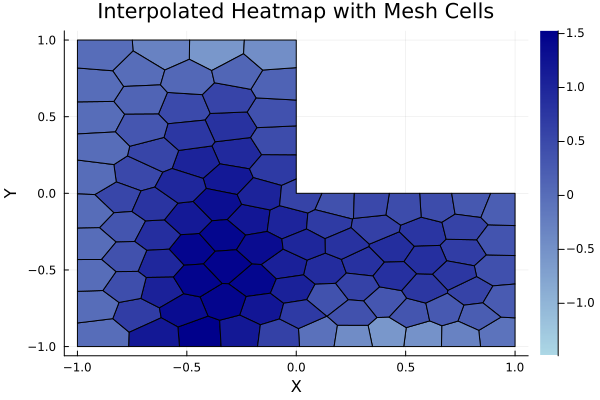

In [32]:
#PlotSolution(mat_data, u)
plot_heatmap(mat_data, u)

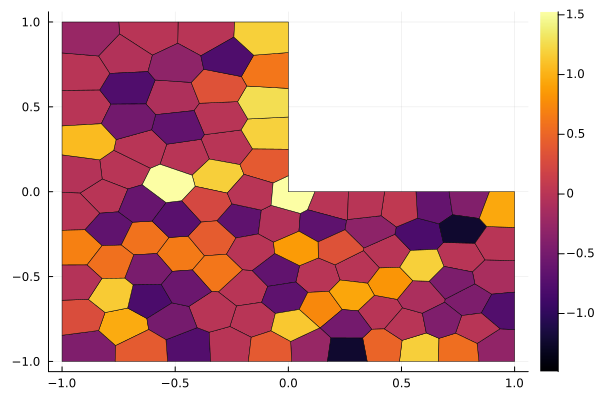

In [28]:
PlotSolution(mat_data, a)

In [29]:
println("Number of elements: ", length(mat_data.elements))
println("Number of vertices: ", length(mat_data.vertices))
println("a", size(a))

Number of elements: 100
Number of vertices: 239
a(239,)


In [26]:
a = [
    0.0000, 0.0000, -0.0000, -0.0000, -0.0000, 0.0000, 0.0000, 0.0000, 1.1840, -0.0000,
   -0.7588, -0.4278, -0.2482, -0.8117, -0.6687, -0.6621, -0.0750, -0.0000, -0.0000, -0.0000,
   -0.0000, -0.4477, -0.2998, -0.0000, -0.0000, 0.2360, -0.0274, 0.6465, 0.9687, -0.0000,
   -0.0000, -0.0000, -0.0000, 0.4211, 0.6908, 1.1963, 1.2776, -0.0456, 1.1840, 0.6211,
   -0.6331, -0.6525, 0.2925, -0.0456, 0.0540, 0.6211, 0.5890, 0.3358, -0.6747, -0.7819,
   -0.7107, -0.1148, -0.3166, -0.4742, -0.6486, -0.6117, -0.6759, -0.7882, -0.7613, -0.8119,
   -0.3278, -0.5282, -0.0000, -0.0000, 0.4042, 0.4880, 0.0000, 0.0000, 0.0000, -0.4548,
   -0.4135, -0.5065, -1.2396, -1.2396, -0.0000, 0.4063, -0.1035, 0.0000, -0.2421, -0.0000,
    1.1866, 1.1866, 1.5251, 1.5251, 0.5627, 0.8293, 0.3341, 0.4144, 0.5810, 0.7465,
    0.9336, 0.9489, 1.1422, 1.0642, 1.1574, 0.8646, -0.4274, -0.5791, -0.5125, -0.0274,
   -0.2825, -0.2799, -0.5957, -0.5817, -0.3710, -0.5452, -0.0275, -0.1524, 0.1567, 0.0291,
   -0.0922, -0.3485, -0.0712, -0.5578, -0.6567, 0.1898, -0.0000, 0.1739, -0.0003, -0.0000,
    0.8477, 0.4479, 0.1591, 0.1836, 0.4651, 0.6751, 0.6966, -0.5829, -0.5791, -0.3836,
   -0.4274, -0.5086, -0.5086, -0.2927, -0.4193, -0.4786, -0.2927, -0.0750, -0.2122, -0.0000,
   -0.0000, -0.3411, -0.4674, -0.3040, -0.0000, -0.2328, -0.0000, -0.5775, -0.0000, -0.8390,
   -0.4180, -0.2535, -1.1661, -1.1043, -1.0306, -0.6262, -0.7319, 1.0859, 1.0323, 1.1706,
    1.1476, -0.0000, -0.0000, -0.1803, -0.1786, -0.0000, -0.0000, -0.0000, -0.4000, 0.0075,
   -0.1426, 0.2971, 0.0717, 0.1341, -0.2710, -0.0000, -0.0000, -0.0000, -0.0000, -0.5162,
   -0.7962, -0.8390, -1.0958, -1.2462, -1.4862, -1.4862, -0.0000, -0.4384, -0.2640, -0.3032,
    1.0060, 0.6886, 0.8342, 0.9918, -0.5143, -0.4386, -0.7309, -0.7468, -0.6048, -0.0427,
   -0.2554, 0.2260, 0.2056, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, 0, -0.0000,
   -0.0000, -0.9568, -1.1041, 0.7853, 0.9500, 0.4798, 0.3837, 0.5366, 0.6409, -0.2085,
   -0.3393, -0.2654, -0.0355, -0.0236, -0.0540, -0.7195, -0.6826, -0.7987, -0.9509, -0.7467,
   -0.5155, -0.4935, -0.9686, -0.9919, -1.0559, -1.0870, -0.6753, -0.6780, -0.6041
]


239-element Vector{Float64}:
  0.0
  0.0
 -0.0
 -0.0
 -0.0
  0.0
  0.0
  0.0
  1.184
 -0.0
 -0.7588
 -0.4278
 -0.2482
  ⋮
 -0.7987
 -0.9509
 -0.7467
 -0.5155
 -0.4935
 -0.9686
 -0.9919
 -1.0559
 -1.087
 -0.6753
 -0.678
 -0.6041

In [37]:
# Function to plot the mesh with vertex-based solution values
function PlotSolutionWithVertexColors(mesh_data::Mesh, solution::Vector{Float64})
    # Initialize the plot with color interpolation and colorbar
    fig = plot(legend = false, colorbar = :right)

    # Loop through each element and plot its polygon with interpolated vertex colors
    for element in mesh_data.elements
        # Extract the vertices of the element
        verts = [mesh_data.vertices[v] for v in element]
        x = [v[1] for v in verts]
        y = [v[2] for v in verts]

        # Get the solution values at the vertices
        z = [solution[v] for v in element]

        # Close the polygon by adding the first vertex at the end
        push!(x, verts[1][1])
        push!(y, verts[1][2])
        push!(z, z[1])

        # Plot the polygon with the vertex colors
        plot!(x, y, fill = true, fill_z = z, linecolor = :black, lw = 0.5)
    end

    return fig
end

PlotSolutionWithVertexColors (generic function with 1 method)

In [59]:
using Plots
using Interpolations

# Function to create a smooth heatmap with overlayed element boundaries
function PlotSmoothSolutionWithBoundaries(mesh_data::Mesh, solution::Vector{Float64})
    # Extract the x and y coordinates of the vertices
    x_coords = [v[1] for v in mesh_data.vertices]
    y_coords = [v[2] for v in mesh_data.vertices]
    
    # Extract the min and max coordinates for x and y
    x_min, x_max = minimum(x_coords), maximum(x_coords)
    y_min, y_max = minimum(y_coords), maximum(y_coords)

    # Create a grid of points for interpolation
    grid_size = 200  # Adjust this for smoother or coarser plots
    x_grid = range(x_min, x_max, length=grid_size)
    y_grid = range(y_min, y_max, length=grid_size)

    # Interpolate the solution values onto the grid
    # Create a linear interpolation from the mesh vertices and solution values
    itp = interpolate((x_coords, y_coords), solution, Gridded(Linear()))

    # Create a matrix to hold the interpolated solution values
    z_grid = [itp(x, y) for y in y_grid, x in x_grid]

    # Plot the smooth heatmap
    heatmap(x_grid, y_grid, z_grid, color=:viridis, aspect_ratio=:equal, legend=false)

    # Overlay the element boundaries
    for element in mesh_data.elements
        # Extract the vertices of the element
        verts = [mesh_data.vertices[v] for v in element]
        x = [v[1] for v in verts]
        y = [v[2] for v in verts]

        # Close the polygon by adding the first vertex at the end
        push!(x, verts[1][1])
        push!(y, verts[1][2])

        # Plot the polygon boundary on top of the heatmap
        plot!(x, y, linecolor=:black, lw=1.5)
    end

    return
end

PlotSmoothSolutionWithBoundaries (generic function with 1 method)

In [60]:
PlotSmoothSolutionWithBoundaries(mat_data, a)

LoadError: MethodError: no method matching interpolate(::Tuple{Vector{Float64}, Vector{Float64}}, ::Vector{Float64}, ::Gridded{Linear{Throw{OnGrid}}})
[0mClosest candidates are:
[0m  interpolate(::Tuple{Vararg{Union{AbstractVector{T}, Tuple} where T, N}}, [91m::AbstractArray{Tel, N}[39m, ::IT) where {Tel, N, IT<:Union{NoInterp, Tuple{Vararg{Union{NoInterp, Gridded}}}, Gridded}} at ~/.julia/packages/Interpolations/91PhN/src/gridded/gridded.jl:165
[0m  interpolate([91m::Type{TWeights}[39m, [91m::Type{TC}[39m, ::Any, [91m::IT[39m) where {TWeights, TC, IT<:Union{NoInterp, Tuple{Vararg{Union{NoInterp, BSpline}}}, BSpline}} at ~/.julia/packages/Interpolations/91PhN/src/b-splines/b-splines.jl:166
[0m  interpolate([91m::Type{TWeights}[39m, [91m::Type{TC}[39m, ::Any, [91m::IT[39m, [91m::Real[39m, [91m::Int64[39m) where {TWeights, TC, IT<:Union{NoInterp, Tuple{Vararg{Union{NoInterp, BSpline}}}, BSpline}} at ~/.julia/packages/Interpolations/91PhN/src/b-splines/b-splines.jl:171
[0m  ...

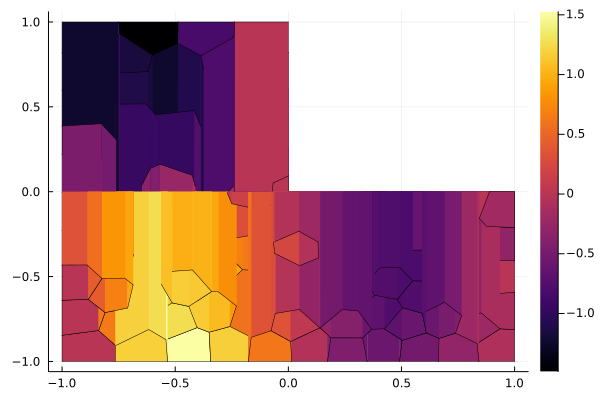

In [42]:
PlotSolutionWithVertexColors(mat_data, a)

In [213]:
tolerance = 0.23  # Define your tolerance level

# Check if all values are within the tolerance
within_tolerance = all(abs.(a .- u) .< tolerance)

# Output the result
println("All values within tolerance: ", within_tolerance)

All values within tolerance: true


## Plotting Solution

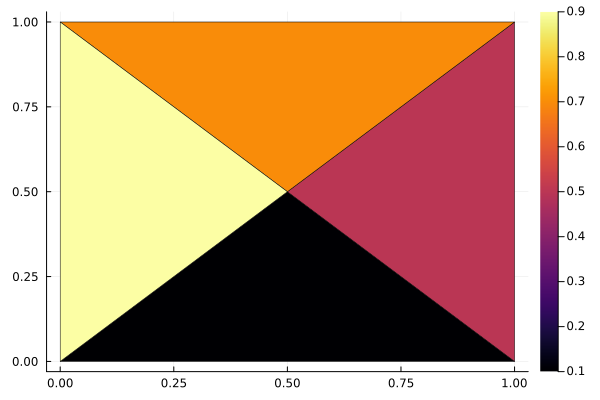

In [382]:
# Example mesh data
vertices = [(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.5, 0.5)]
elements = [[1, 2, 5], [2, 3, 5], [3, 4, 5], [4, 1, 5]]
vsol = [0.1, 0.5, 0.7, 0.9]  # Values assigned to each element
boundary = [1, 2, 3, 4]

# Create the mesh
mesh_data = Mesh(boundary, elements, vertices)

# Plot the mesh with the colorbar
PlotSolution(mesh_data, vsol)



In [383]:
PlotSolution(mesh,u)

LoadError: BoundsError: attempt to access 239-element Vector{Tuple{Float64, Float64}} at index [240]

In [385]:

# Load the mesh and solve the VEM problem
#mesh_filepath = "data/voronoi.mat"
mesh_filepath = "/Users/roryyarr/Desktop/UON/Summer project 2023-2024/NA45/vem_50lines/meshes/squares.mat"
u = vem(mesh_filepath, square_domain_rhs, square_domain_boundary_condition)

# Plot the solution
mesh = matread(mesh_filepath)
plot_solution(mesh, u)


LoadError: MethodError: no method matching vem(::String, ::typeof(square_domain_rhs), ::typeof(square_domain_boundary_condition))
[0mClosest candidates are:
[0m  vem([91m::Mesh[39m, ::Function, ::Function; debug) at In[178]:1

In [ ]:
filepath = "/Users/roryyarr/Desktop/UON/Summer project 2023-2024/NA45/vem_50lines/meshes/squares.mat"

open(filepath,"r")


In [361]:
function plotsolution(mesh::Mesh, solution::Vector{Float64})
    # Create a new figure
    plt = plot(title="Approximate Solution", xlabel="x", ylabel="y", zlabel="u", aspect_ratio=:equal)

    # Find the maximum number of vertices in any element
    max_n_vertices = maximum(length.(mesh.elements))

    # Function to pad element vertex lists
    function pad_element(vertex_list)
        return [vertex_list; fill(NaN, max_n_vertices - length(vertex_list))]
    end

    # Pad all elements
    elements = pad_element.(mesh.elements)

    # Extract x and y coordinates
    x = [v[1] for v in mesh.vertices]
    y = [v[2] for v in mesh.vertices]

    # Plot each element
    for element in elements
        valid_indices = findall(!isnan, element)
        if length(valid_indices) >= 3  # Only plot if we have at least a triangle
            element_x = x[Int.(element[valid_indices])]
            element_y = y[Int.(element[valid_indices])]
            element_z = solution[Int.(element[valid_indices])]
            
            # # Plot the element
            # plot!(plt, element_x, element_y, element_z, 
            #       fill=(0, :auto), linealpha=0.5, 
            #       color=:viridis, colorbar=true)
            
            # # Plot the edges
            # for i in 1:length(valid_indices)
            #     j = i % length(valid_indices) + 1
            #     plot!(plt, [element_x[i], element_x[j]], 
            #                [element_y[i], element_y[j]], 
            #                [element_z[i], element_z[j]], 
            #           color=:black, linewidth=0.5)
            # end

            # Plot the contour for the element
            contour!(plt, element_x, element_y, element_z, 
            fill=true, color=:viridis, linewidth=0.5)

            # Optionally plot the edges to highlight the element boundaries
            for i in 1:length(valid_indices)
            j = i % length(valid_indices) + 1
            plot!(plt, [element_x[i], element_x[j]], 
                [element_y[i], element_y[j]], 
                color=:black, linewidth=0.5)
            end
        end
    end

    # Set axis limits
    # xlims!(plt, (minimum(x) - 0.1, maximum(x) + 0.1))
    # ylims!(plt, (minimum(y) - 0.1, maximum(y) + 0.1))
    # zlims!(plt, (minimum(solution) - 0.1, maximum(solution) + 0.1))

    # Display the plot
    #display(plt)
end

plotsolution (generic function with 1 method)

In [362]:
plotsolution(mat_data, u)

In [267]:
function plot_contour_solution(mesh::Mesh, solution::Vector{Float64})
    # Create a new figure
    plt = plot(title="Contour Plot of Solution", xlabel="x", ylabel="y", aspect_ratio=:equal)

    # Extract x and y coordinates from mesh vertices
    x = [v[1] for v in mesh.vertices]
    y = [v[2] for v in mesh.vertices]

    println("x coordinates: ", x)
    println("y coordinates: ", y)

    # Find the maximum number of vertices in any element
    max_n_vertices = maximum(length.(mesh.elements))

    # Function to pad element vertex lists
    function pad_element(vertex_list)
        return [vertex_list; fill(NaN, max_n_vertices - length(vertex_list))]
    end

    # Pad all elements
    elements = pad_element.(mesh.elements)
    println("Elements (after padding): ", elements)

    # Collect data for the contour plot
    for element in elements
        valid_indices = findall(!isnan, element)
        println("Valid indices for element: ", valid_indices)

        if length(valid_indices) >= 3  # Only plot if we have at least a triangle
            element_x = x[Int.(element[valid_indices])]
            element_y = y[Int.(element[valid_indices])]
            element_z = solution[Int.(element[valid_indices])]

            println("Element x: ", element_x)
            println("Element y: ", element_y)
            println("Element z (solution values): ", element_z)

            # Create a contour plot for the solution values over the mesh
            contour!(plt, element_x, element_y, element_z, fill=true, levels=10, color=:viridis, linewidth=0)
        end
    end

    # Filter out NaN values from x and y
    valid_x = filter(!isnan, x)
    valid_y = filter(!isnan, y)

    println("Filtered valid_x: ", valid_x)
    println("Filtered valid_y: ", valid_y)

    # Set axis limits using valid x and y values
    xlims!(plt, (minimum(valid_x) - 0.1, maximum(valid_x) + 0.1))
    ylims!(plt, (minimum(valid_y) - 0.1, maximum(valid_y) + 0.1))

    println("X axis limits: ", (minimum(valid_x) - 0.1, maximum(valid_x) + 0.1))
    println("Y axis limits: ", (minimum(valid_y) - 0.1, maximum(valid_y) + 0.1))

    # Display the plot
    display(plt)
end

plot_contour_solution (generic function with 1 method)

In [268]:
plot_contour_solution(mat_data, u)

x coordinates: [-1.0000000000187022, -1.0000000000187024, 1.000000000416914, 1.000000000383344, -1.000000000012256, -1.0000000000194358, -1.0000000000194358, -1.0000000000154896, -0.34339007529593113, 1.0000000003734257, 0.38037985417577147, 0.824302020165727, 0.899120634308235, 0.4812404878837506, 0.6924778903693398, 0.6907181120976549, 0.8422761299996395, 1.0000000003734257, 1.0000000002952771, 1.000000000416914, 1.0000000002952771, 0.8138119906844412, 0.8690720378749037, -1.000000000012256, -1.0000000000120797, -0.7507934161417809, -0.7091792428329672, -0.8385125585858719, -0.7632634563426708, -1.0000000000191787, -1.0000000000138602, -1.0000000000191787, -1.0000000000138602, -0.8838304218587459, -0.8100631803750576, -0.6172399117546845, -0.540871075244798, 0.014729933575431176, -0.3433900752947818, -0.17694539350153415, 0.307380924106641, 0.36832874454880926, -0.05742681493878976, 0.014729933574392895, 0.01020983976792067, -0.17694539349894056, -0.16404352331636152, -0.076538054699

LoadError: Arrays have incorrect length or dimension.

In [316]:
function plotsolution3(mesh::Mesh, solution::Vector{Float64})
    # Create a 2D figure
    plt = plot(title="Approximate Solution", xlabel="x", ylabel="y", aspect_ratio=:equal)

    # Find the maximum number of vertices in any element
    max_n_vertices = maximum(length.(mesh.elements))

    # Function to pad element vertex lists
    function pad_element(vertex_list)
        return [vertex_list; fill(NaN, max_n_vertices - length(vertex_list))]
    end

    # Pad all elements
    elements = pad_element.(mesh.elements)

    # Extract x and y coordinates
    x = [v[1] for v in mesh.vertices]
    y = [v[2] for v in mesh.vertices]

    # Plot each element as a filled patch, using 'solution' values for color
    for element in elements
        valid_indices = findall(!isnan, element)
        if length(valid_indices) >= 3  # Only plot if we have at least a triangle
            element_x = x[Int.(element[valid_indices])]
            element_y = y[Int.(element[valid_indices])]
            element_z = solution[Int.(element[valid_indices])]  # Use this for coloring
            
            # Fill the 2D polygon with color corresponding to the solution values
            plot!(plt, element_x, element_y, 
                  fill=true, fillalpha=0.7, 
                  c=:viridis, marker_z=mean(element_z),  # Use average solution value for color
                  linealpha=0.5, linewidth=0.5, legend=false)
        end
    end

    # Set axis limits
    xlims!(plt, (minimum(x) - 0.1, maximum(x) + 0.1))
    ylims!(plt, (minimum(y) - 0.1, maximum(y) + 0.1))

    # Add colorbar for reference
    #colorbar!(plt, label="Solution value (z)")

    # Display the plot
    display(plt)
end

plotsolution3 (generic function with 1 method)

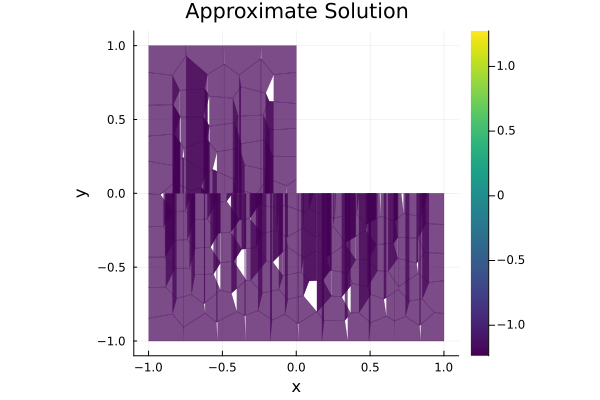

In [318]:
plotsolution3(mat_data, u)

In [314]:
using Statistics

In [353]:
function plotsolution_contour(mesh::Mesh, solution::Vector{Float64})
    # Extract x and y coordinates
    x = [v[1] for v in mesh.vertices]
    y = [v[2] for v in mesh.vertices]

    # Prepare grid for contour plot
    num_points = 10
    x_grid = range(minimum(x), stop=maximum(x), length=num_points)
    y_grid = range(minimum(y), stop=maximum(y), length=num_points)

    # Create empty grid to store interpolated solution values
    z_grid = [NaN for _ in x_grid, _ in y_grid]

    # Loop through each element and fill the grid with the interpolated solution values
    for (i, element) in enumerate(mesh.elements)
        # Extract vertex coordinates for this element
        element_x = [x[v] for v in element]
        element_y = [y[v] for v in element]
        element_z = solution[Int.(element)]  # Use the solution values for this element
        
        # Calculate the centroid of the element (mean of vertex coordinates)
        centroid_x = mean(element_x)
        centroid_y = mean(element_y)
        centroid_z = mean(element_z)
        
        # Find the nearest grid point to the centroid and assign the average solution value
        nearest_x_idx = findmin(abs.(x_grid .- centroid_x))[2]
        nearest_y_idx = findmin(abs.(y_grid .- centroid_y))[2]
        
        # Fill the grid point with the interpolated solution value (centroid of the element)
        z_grid[nearest_x_idx, nearest_y_idx] = centroid_z
    end


    println("x_grid: ", x_grid)
    println("y_grid: ", y_grid)
    println("z_grid: ", z_grid)

    # Create a contour plot based on the solution data
    contourf(x_grid, y_grid, z_grid, color=:viridis, legend=false)
end

plotsolution_contour (generic function with 1 method)

x_grid: -7.747809338543021e-12:0.11111111113952973:1.0000000002480198
y_grid: -6.828516918577776e-12:0.11111111114343417:1.000000000284079
z_grid: [0.005334659560275915 0.017503755418152973 0.017218256947493894 0.02773450726504729 0.07799402939670638 0.06809661974867752 0.04783213435974344 0.07659222995825782 0.06472832461106956 0.06727917664010079; 0.05268035781513528 0.0947315193165337 0.08132999659704539 0.3612471943881449 0.2850414351217586 0.15142292051049372 0.3293001766824955 0.3203830650545979 0.22983060806451935 0.1643092261444536; 0.032386008087402364 0.15839625701315188 0.4115139443310033 0.34946777027877685 0.5356016072931146 0.4553278195278014 0.4519845917676976 0.42480720397794997 0.5347136957767458 0.5035111594689661; 0.0352351816939525 0.14606733437926223 0.355327460856834 0.5465502522331432 0.706702579644798 0.7300090792513022 0.7139149369423906 0.6374310026755996 0.5615963340645117 0.5780168592816224; 0.056804677454037784 0.3555345627878388 0.5016178474426907 0.679090

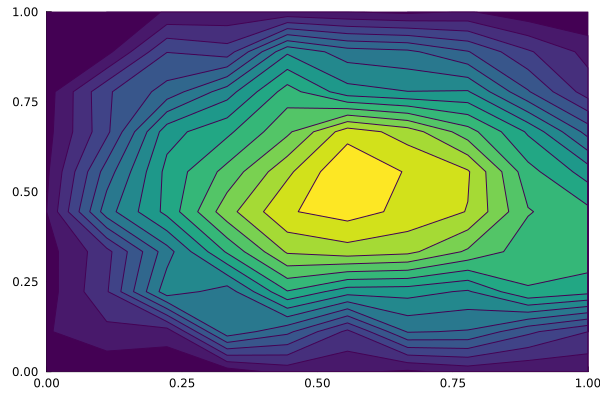

In [354]:
plotsolution_contour(mat_data, u)

In [376]:
function create_geodataframe(mesh::Mesh, solution::Vector{Float64})
    # DataFrame to store geometries and solution values
    gdf = DataFrame(:geometry => GeometryBasics.Polygon[], :solution => Float64[])

    # Extract vertices
    vertices = mesh.vertices

    # Loop through each element and create a polygon
    for element in mesh.elements
        # Get the x, y coordinates of the vertices in the element
        # Convert tuples into GeometryBasics.Point
        polygon_coords = [GeometryBasics.Point(vertices[v][1], vertices[v][2]) for v in element]
        
        # Create a Polygon object using GeometryBasics
        polygon = GeometryBasics.Polygon(polygon_coords)
        
        # Compute the mean solution value for the element
        avg_solution = mean(solution[Int.(element)])

        # Add polygon and solution value to the dataframe
        push!(gdf, (polygon, avg_solution))
    end

    return gdf
end

# Optionally save as a shapefile
function save_to_shapefile(df::DataFrame, filepath::String)
    Shapefile.write(filepath, df, geometry_column=:geometry)
end

save_to_shapefile (generic function with 1 method)

In [377]:
create_geodataframe(mat_data, u)

Row,geometry,solution
,Polygon,Float64
1,"Polygon{2, Float64, Point{2, Float64}, LineString{2, Float64, Point{2, Float64}, ReinterpretArray{Line{2, Float64}, 1, Tuple{Point{2, Float64}, Point{2, Float64}}, TupleView{Tuple{Point{2, Float64}, Point{2, Float64}}, 2, 1, Vector{Point{2, Float64}}}, false}}, Vector{LineString{2, Float64, Point{2, Float64}, ReinterpretArray{Line{2, Float64}, 1, Tuple{Point{2, Float64}, Point{2, Float64}}, TupleView{Tuple{Point{2, Float64}, Point{2, Float64}}, 2, 1, Vector{Point{2, Float64}}}, false}}}}(Line{2, Float64}[Line([0.522788, 0.669986] => [0.524823, 0.668004]), Line([0.524823, 0.668004] => [0.528813, 0.667258]), Line([0.528813, 0.667258] => [0.563114, 0.708325]), Line([0.563114, 0.708325] => [0.54504, 0.73379]), Line([0.54504, 0.73379] => [0.517292, 0.736032])], LineString{2, Float64, Point{2, Float64}, Base.ReinterpretArray{Line{2, Float64}, 1, Tuple{Point{2, Float64}, Point{2, Float64}}, TupleView{Tuple{Point{2, Float64}, Point{2, Float64}}, 2, 1, Vector{Point{2, Float64}}}, false}}[])",0.806806
2,"Polygon{2, Float64, Point{2, Float64}, LineString{2, Float64, Point{2, Float64}, ReinterpretArray{Line{2, Float64}, 1, Tuple{Point{2, Float64}, Point{2, Float64}}, TupleView{Tuple{Point{2, Float64}, Point{2, Float64}}, 2, 1, Vector{Point{2, Float64}}}, false}}, Vector{LineString{2, Float64, Point{2, Float64}, ReinterpretArray{Line{2, Float64}, 1, Tuple{Point{2, Float64}, Point{2, Float64}}, TupleView{Tuple{Point{2, Float64}, Point{2, Float64}}, 2, 1, Vector{Point{2, Float64}}}, false}}}}(Line{2, Float64}[Line([0.327884, 0.612917] => [0.352568, 0.605808]), Line([0.352568, 0.605808] => [0.37652, 0.613085]), Line([0.37652, 0.613085] => [0.380175, 0.621493]), Line([0.380175, 0.621493] => [0.367684, 0.681673]), Line([0.367684, 0.681673] => [0.347228, 0.681684])], LineString{2, Float64, Point{2, Float64}, Base.ReinterpretArray{Line{2, Float64}, 1, Tuple{Point{2, Float64}, Point{2, Float64}}, TupleView{Tuple{Point{2, Float64}, Point{2, Float64}}, 2, 1, Vector{Point{2, Float64}}}, false}}[])",0.768895
3,"Polygon{2, Float64, Point{2, Float64}, LineString{2, Float64, Point{2, Float64}, ReinterpretArray{Line{2, Float64}, 1, Tuple{Point{2, Float64}, Point{2, Float64}}, TupleView{Tuple{Point{2, Float64}, Point{2, Float64}}, 2, 1, Vector{Point{2, Float64}}}, false}}, Vector{LineString{2, Float64, Point{2, Float64}, ReinterpretArray{Line{2, Float64}, 1, Tuple{Point{2, Float64}, Point{2, Float64}}, TupleView{Tuple{Point{2, Float64}, Point{2, Float64}}, 2, 1, Vector{Point{2, Float64}}}, false}}}}(Line{2, Float64}[Line([0.506081, 0.501899] => [0.51086, 0.500729]), Line([0.51086, 0.500729] => [0.53502, 0.543633]), Line([0.53502, 0.543633] => [0.491687, 0.567331]), Line([0.491687, 0.567331] => [0.487797, 0.564717])], LineString{2, Float64, Point{2, Float64}, Base.ReinterpretArray{Line{2, Float64}, 1, Tuple{Point{2, Float64}, Point{2, Float64}}, TupleView{Tuple{Point{2, Float64}, Point{2, Float64}}, 2, 1, Vector{Point{2, Float64}}}, false}}[])",0.859628
4,"Polygon{2, Float64, Point{2, Float64}, LineString{2, Float64, Point{2, Float64}, ReinterpretArray{Line{2, Float64}, 1, Tuple{Point{2, Float64}, Point{2, Float64}}, TupleView{Tuple{Point{2, Float64}, Point{2, Float64}}, 2, 1, Vector{Point{2, Float64}}}, false}}, Vector{LineString{2, Float64, Point{2, Float64}, ReinterpretArray{Line{2, Float64}, 1, Tuple{Point{2, Float64}, Point{2, Float64}}, TupleView{Tuple{Point{2, Float64}, Point{2, Float64}}, 2, 1, Vector{Point{2, Float64}}}, false}}}}(Line{2, Float64}[Line([0.495737, 0.325599] => [0.558956, 0.342771]), Line([0.558956, 0.342771] => [0.559431, 0.343524]), Line([0.559431, 0.343524] => [0.545464, 0.380612]), Line([0.545464, 0.380612] => [0.483131, 0.395445]), Line([0.483131, 0.395445] => [0.463221, 0.379195])], LineString{2, Float64, Point{2, Float64}, Base.ReinterpretArray{Line{2, Float64}, 1, Tuple{Point{2, Float64}, Point{2, Float64}}, TupleView{Tuple{Point{2, Float64}, Point{2, Float64}}, 2, 1, Vector{Point{2, 

In [31]:
# Function to plot the interpolated heatmap with overlaid cell boundaries
function plot_heatmap(mesh::Mesh, solution::Vector{Float64})
    # Extract the vertices and solution values
    x_coords = [v[1] for v in mesh.vertices]
    y_coords = [v[2] for v in mesh.vertices]

    # Create a plot object to start with a color bar
    p = plot(colorbar = :right, legend = false)

    # Loop through each element to fill with interpolated color
    for element in mesh.elements
        # Extract the x, y coordinates of the vertices in the element
        x_elem = x_coords[element]
        y_elem = y_coords[element]
        
        # Get the solution values for the vertices of the element
        solution_elem = solution[element]

        # Fill the polygon (triangle/polygon in this case) with interpolated color
        # The fill_z uses the solution values to interpolate
        plot!(p, x_elem, y_elem, fill_z = solution_elem, seriestype = :shape, lw = 1, color=:blues)
    end

    # Final plot customization
    xlabel!(p, "X")
    ylabel!(p, "Y")
    title!(p, "Interpolated Heatmap with Mesh Cells")
    
    # Display the plot with color bar
    display(p)
end

# Plot the heatmap
plot_heatmap(mat_data, a)

UndefVarError: UndefVarError: `a` not defined

In [89]:
# Function to plot the wireframe mesh with depth corresponding to solution values
function plot_wireframe(mesh::Mesh, solution::Vector{Float64})
    # Extract the vertices and solution values
    x_coords = [v[1] for v in mesh.vertices]
    y_coords = [v[2] for v in mesh.vertices]
    z_coords = solution  # The solution corresponds to the z-axis

    # Create a 3D plot for wireframe
    p = plot(legend = false, lw = 2)

    # Loop through each element to plot the wireframe
    for element in mesh.elements
        # Extract the x, y coordinates of the vertices in the element
        x_elem = x_coords[element]
        y_elem = y_coords[element]
        z_elem = z_coords[element]

        # Close the polygon by appending the first point to the end
        x_elem = vcat(x_elem, x_elem[1])
        y_elem = vcat(y_elem, y_elem[1])
        z_elem = vcat(z_elem, z_elem[1])

        # Plot the wireframe in 3D space (x, y, z)
        plot!(p, x_elem, y_elem, z_elem, seriestype = :wireframe, lw = 2, color=:black)
    end

    # Final plot customization
    xlabel!(p, "X")
    ylabel!(p, "Y")
    zlabel!(p, "Solution Depth")
    title!(p, "3D Wireframe Mesh with Solution Depth")

    # Display the wireframe plot
    display(p)
end

# Plot the heatmap
plot_wireframe(mat_data, a)

LoadError: Arrays have incorrect length or dimension.